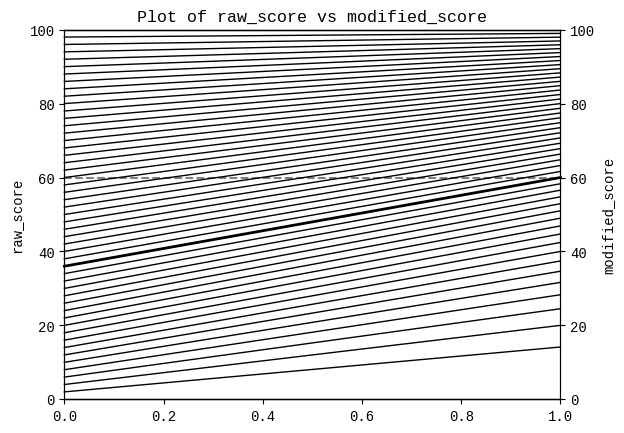

In [23]:
"""
# 开方乘十: 数据的调整

# 题目描述

有这样一种坊间传闻: 大学老师在面对惨不忍睹的考试成绩时, 会给原始成绩统一处理"开放乘十".
俗称: `捞一捞`.
那么捞起来了哪些不及格的同学呢?

## ChatGPT提示词
```
用matplotlib画一张图, 满足如下要求,

数据准备:  左侧y轴表示"raw_score"和右侧y轴表示"modified_score"分别是0到100 这101个数字,

对应关系: 左边的数字开平方以后乘以10对应右边的数字

绘图要求:
        依次绘出左边的所有偶数对应到右边时的连线
        图片中的标题和title等不要使用中文
        所有label等横向显示
        在60处添加一根横线
        左侧36到右侧60的连线, 加粗显示
        使用如下字体Liberation Mono

回答要求: 只给出代码,不需要解释
```
## 解读

这种数据变换的特点
- 值域的取值范围等同于定义域
- 前后的排名关系没有变化
- 变化是平滑的, 没有跳跃
- 对低分段的变化幅度大, 对高分段的变化幅度小
"""


import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'Liberation Mono' # 避免Colab报错中文字体

raw_score = np.arange(0, 101, 1)
modified_score = np.sqrt(raw_score) * 10

even_raw_scores = np.arange(0, 101, 2)
even_modified_scores = np.sqrt(even_raw_scores) * 10

fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()

ax_left.set_ylim(0, 100)
ax_right.set_ylim(0, 100)

ax_left.set_ylabel('raw_score')
ax_right.set_ylabel('modified_score')

ax_left.tick_params(axis='y', labelrotation=0)
ax_right.tick_params(axis='y', labelrotation=0)
ax_left.tick_params(axis='x', labelrotation=0)

ax_left.set_title('Plot of raw_score vs modified_score')

ax_left.axhline(60, color='gray', linestyle='--')

for i in range(len(even_raw_scores)):
    y_left = even_raw_scores[i]
    y_right = even_modified_scores[i]

    coord_left = ax_left.transData.transform((0, y_left))
    coord_right = ax_right.transData.transform((1, y_right))

    inv = fig.transFigure.inverted()
    coord_left_fig = inv.transform(coord_left)
    coord_right_fig = inv.transform(coord_right)

    linewidth = 2 if y_left == 36 else 1
    line = plt.Line2D((coord_left_fig[0], coord_right_fig[0]),
                      (coord_left_fig[1], coord_right_fig[1]),
                      color='k', linewidth=linewidth, transform=fig.transFigure)
    fig.lines.append(line)

plt.show()
